In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# Currently Visits, returns, new, from_11201, and per_hours of those averages, and standard deviations
# Next steps: get the daily values

In [2]:
summed_by_date = pd.read_csv('../Data_And_Data_Creation/advanced_welcome_table_summed.csv')

summary = summed_by_date.describe()

summary = summary[['total_visitors', 'total_returns','total_new','from_11201','avg_visits_per_hour', 'avg_new_per_hour','avg_returns_per_hour', 'avg_from_11201_per_hour', 'ratio_11201']]


C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [20]:
graph_month = summed_by_date.groupby("month", as_index=False).mean()

In [24]:
graph_week = summed_by_date.groupby("week", as_index=False).mean()

In [41]:
#summed_by_date.groupby("week", as_index=False).count()

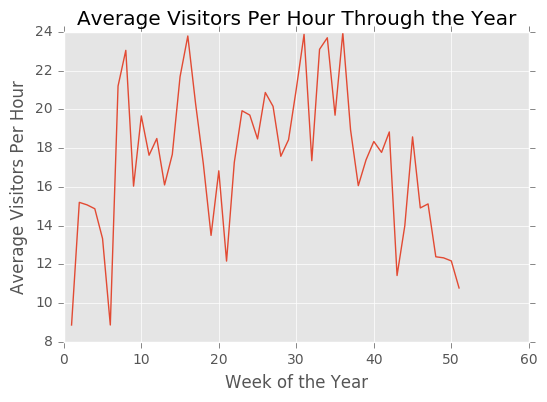

In [37]:
plt.plot(graph_week['week'], graph_week['avg_visits_per_hour'])
plt.xlabel("Week of the Year")
plt.ylabel("Average Visitors Per Hour")
plt.title("Average Visitors Per Hour Through the Year")

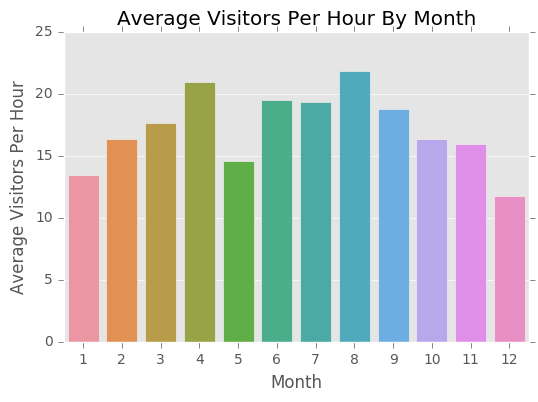

In [66]:
ax = sns.barplot(x="month", y="avg_visits_per_hour", data=graph_month)
ax.set_title("Average Visitors Per Hour By Month")
ax.set_ylabel("Average Visitors Per Hour")
ax.set_xlabel("Month")
plt.savefig("../Figures/Visitors Per Hour By Month")

In [53]:
weekdays =summed_by_date[summed_by_date['day'] < 4]

In [54]:
weekday_monthly = weekdays.groupby("month", as_index=False).mean()

In [55]:
weekends = summed_by_date[summed_by_date['day']> 4]

In [56]:
weekend_monthly = weekends.groupby("month", as_index=False).mean()

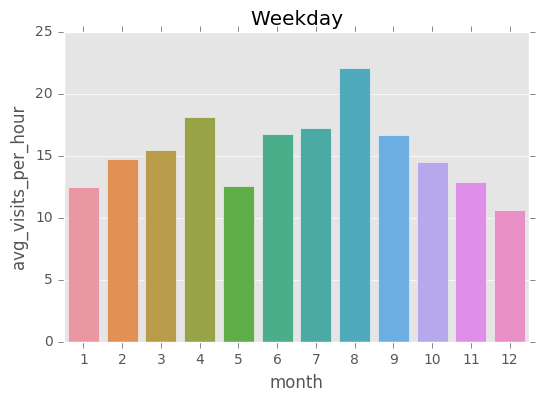

In [60]:
ax = sns.barplot(x="month", y="avg_visits_per_hour", data=weekday_monthly)
ax.set_title("Weekday")

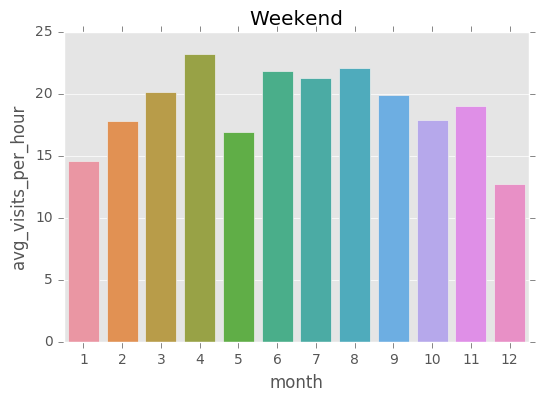

In [61]:
ax = sns.barplot(x="month", y="avg_visits_per_hour", data=weekend_monthly)
ax.set_title("Weekend")

In [3]:
total_visitors =  int(summary.loc['mean'][['total_visitors']])* int(summary.loc['count'][['total_visitors']])

In [17]:
print total_visitors

33318


In [4]:
total_ratio_11201 = int(summary.loc['mean'][['total_visitors']])*int(summary.loc['mean'][['from_11201']])

In [18]:
print total_ratio_11201

1242


In [5]:
summary = summary.loc[['mean','std']]
#summary.rename(columns={'visits_per_hour': 'avg_visits_per_hour', 'new_per_hour': 'avg_new_per_hour','returns_per_hour':'avg_returns_per_hour', 'from_11201_per_hour':'avg_from_11201_per_hour'})

In [6]:
summary_by_month = summed_by_date.groupby('month')#.describe()[['total_visitors', 'total_returns','total_new','from_11201','visits_per_hour', 'new_per_hour', 'from_11201_per_hour']]
print summary_by_month.groups.keys()
January = summary_by_month.get_group(1).describe().loc[['mean','std']]
January = January.rename(columns={'visits_per_hour': 'avg_visits_per_hour', 'new_per_hour': 'avg_new_per_hour','returns_per_hour':'avg_returns_per_hour', 'from_11201_per_hour':'avg_from_11201_per_hour'})
print January

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
      total_visitors  total_returns  total_new  Temperature  from_11201  \
mean       41.222222      21.822222  19.355556    41.054222   22.515152   
std        27.816680      13.457490  18.113475    10.703407   11.272536   

      avg_visits_per_hour  avg_returns_per_hour  avg_new_per_hour  \
mean            13.494444              7.683333          5.800000   
std              6.706190              4.680229          4.267211   

      avg_from_11201_per_hour  ratio_11201       day      week  month  \
mean                 8.446970     0.686982  3.666667  2.666667    1.0   
std                  4.928694     0.248519  2.000000  1.224745    0.0   

             year  precipitation  cloud_cover      snow      rain  
mean  2017.088889       0.003533     0.369778  0.133333  0.288889  
std      0.792643       0.008782     0.257968  0.343776  0.458368  


In [7]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]
averages = []
for i in range(1,13):
    #months.append(i)
    averages.append(summary_by_month.get_group(i)['total_visitors'].mean())

In [8]:
month_averages =  pd.DataFrame( {
        "month" : months,
        "average" : averages
    })

In [9]:
month_averages

,average,month
0,41.222222,Jan
1,51.326087,Feb
2,54.730769,Mar
3,67.333333,Apr
4,44.925926,May
5,62.708333,Jun
6,61.333333,Jul
7,64.677966,Aug
8,58.900000,Sep
9,52.063492,Oct


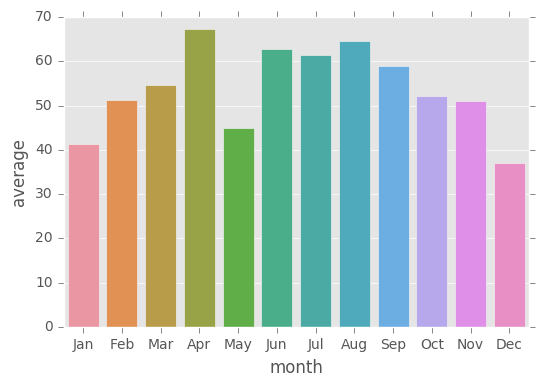

In [13]:
ax = sns.barplot(x="month", y="average", data=month_averages)


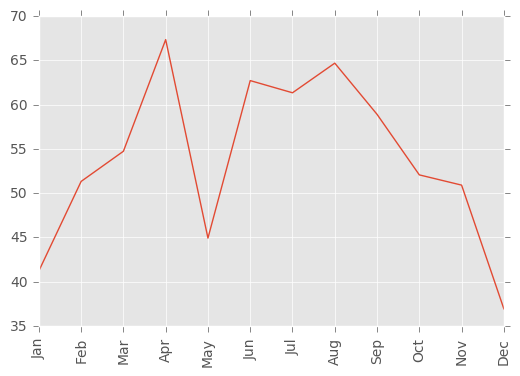

In [10]:
ax = month_averages.average.plot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(month_averages.month, rotation=90)
